<a href="https://colab.research.google.com/github/masifkhan3/Stackemission/blob/main/Stackemission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Emissions Calculator - Steam Load and Fuel Type Based
Valid steam load ranges:
Low: 0-10 TPH
Medium: 11-50 TPH
High: 51-150 TPH

Enter steam load (TPH): 10

Fuel type options:
1. Coal
2. Biomass
3. Mixed

Select fuel type (1-3): 3
Enter coal percentage (0-100): 80

Operating Parameters:
Steam Load: 10.00 TPH
Load Range: LOW
Fuel Type: MIXED
Fuel Mix: Coal 80.0%, Biomass 20.0%

Emissions Results:


,Parameter,Value
0,Oxygen (%),17.0
1,Carbon Dioxide (%),10.0
2,Carbon Monoxide (mg/nm³),890.0
3,Sulphur Dioxide (mg/nm³),1800.0
4,Nitrogen Dioxide (mg/nm³),120.0
5,Nitrogen Oxide (mg/nm³),210.0
6,NOx (mg/nm³),1290.0
7,Particulate Matter (mg/nm³),510.0



PEQS Compliance Status:


,Parameter,Calculated Value (mg/nm³),PEQS Limit (mg/nm³),Percentage of Limit,Status
0,Carbon Monoxide,890.0,800,111.2%,❌ Exceeded
1,Sulphur Dioxide,1800.0,1700,105.9%,❌ Exceeded
2,Nox,1290.0,1200,107.5%,❌ Exceeded
3,Particulate Matter,510.0,500,102.0%,❌ Exceeded


<ipython-input-23-3a6eb943f256>:231: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([param.replace('_', ' ').title() for param in parameters], rotation=45)


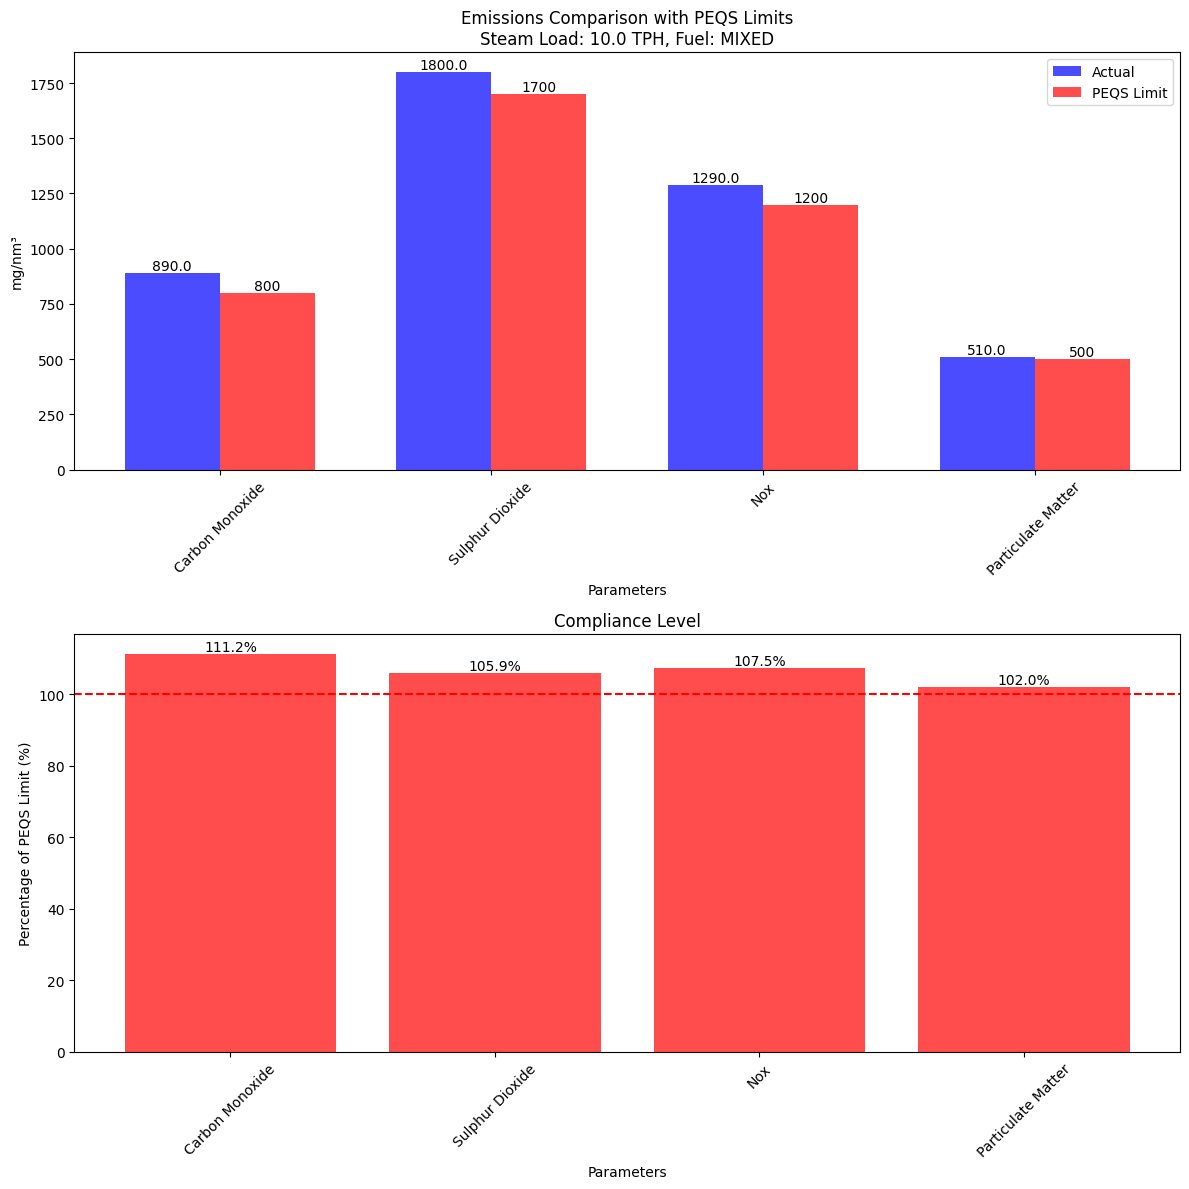

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

class EmissionsCalculator:
    def __init__(self):
        # Steam capacity ranges
        self.steam_ranges = {
            'low': (0, 10),      # 0-10 TPH
            'medium': (11, 50),  # 11-50 TPH
            'high': (51, 150)    # 51-150 TPH
        }

        # Emission factors by fuel type and load range
        self.factors = {
            'coal': {
        'low': {
            'oxygen': 2,                   # %
            'carbon_dioxide':  0.5,           # %
            'carbon_monoxide': 90,         # mg/nm3
            'sulphur_dioxide': 180,         # mg/nm3
            'nitrogen_dioxide': 12,        # mg/nm3
            'nitrogen_oxide': 20,           # mg/nm3
            'nox': 130,                     # mg/nm3
            'particulate_matter': 50       # mg/nm3
        },
        'medium': {
            'oxygen': .4,                   # %
            'carbon_dioxide': 0.1,            # %
            'carbon_monoxide': 17,         # mg/nm3
            'sulphur_dioxide': 35,         # mg/nm3
            'nitrogen_dioxide': 3,        # mg/nm3
            'nitrogen_oxide': 5,           # mg/nm3
            'nox': 25,                     # mg/nm3
            'particulate_matter': 11       # mg/nm3
        },
        'high': {
            'oxygen': .13,                   # %
            'carbon_dioxide': .035,            # %
            'carbon_monoxide': 7,         # mg/nm3
            'sulphur_dioxide': 13,        # mg/nm3
            'nitrogen_dioxide': 20,        # mg/nm3
            'nitrogen_oxide': 25,          # mg/nm3
            'nox': 10,                     # mg/nm3
            'particulate_matter': 4       # mg/nm3
        }
    },
    'biomass': {
        'low': {
            'oxygen': 0.5,                   # %
            'carbon_dioxide': 3,            # %
            'carbon_monoxide': 85,         # mg/nm3
            'sulphur_dioxide': 180,         # mg/nm3
            'nitrogen_dioxide': 12,        # mg/nm3
            'nitrogen_oxide': 25,           # mg/nm3
            'nox': 125,                     # mg/nm3
            'particulate_matter': 55       # mg/nm3
        },
        'medium': {
            'oxygen': 0.36,                   # %
            'carbon_dioxide': .08,            # %
            'carbon_monoxide': 17,         # mg/nm3
            'sulphur_dioxide': 35,         # mg/nm3
            'nitrogen_dioxide': 2.4,        # mg/nm3
            'nitrogen_oxide': 5,           # mg/nm3
            'nox': 25,                     # mg/nm3
            'particulate_matter': 11       # mg/nm3
        },
        'high': {
            'oxygen': 0.13,                   # %
            'carbon_dioxide': .026,            # %
            'carbon_monoxide': 5.6,         # mg/nm3
            'sulphur_dioxide': 11,        # mg/nm3
            'nitrogen_dioxide': 0.8,        # mg/nm3
            'nitrogen_oxide': 1.47,          # mg/nm3
            'nox': 8.35,                     # mg/nm3
            'particulate_matter': 3.65       # mg/nm3
        }
    }
}

        self.peqs_limits = {
            'carbon_monoxide': 800,      # mg/nm3
            'sulphur_dioxide': 1700,     # mg/nm3
            'nox': 1200,                 # mg/nm3
            'particulate_matter': 500    # mg/nm3
        }

    def get_load_range(self, steam_load):
        for range_name, (min_load, max_load) in self.steam_ranges.items():
            if min_load <= steam_load <= max_load:
                return range_name
        return 'high'

    def calculate_emissions(self, steam_load, fuel_type, fuel_mix=None):
        """
        Calculate emissions based on steam load and fuel type
        steam_load: tons/hour (TPH)
        fuel_type: 'coal' or 'biomass' or 'mixed'
        fuel_mix: dict with 'coal' and 'biomass' percentages if fuel_type is 'mixed'
        """
        load_range = self.get_load_range(steam_load)

        if fuel_type == 'mixed' and fuel_mix:
            # Calculate weighted emissions for fuel mix
            coal_emissions = {param: value * (fuel_mix['coal']/100)
                            for param, value in self.factors['coal'][load_range].items()}
            biomass_emissions = {param: value * (fuel_mix['biomass']/100)
                               for param, value in self.factors['biomass'][load_range].items()}

            emissions = {param: coal_emissions[param] + biomass_emissions[param]
                        for param in coal_emissions.keys()}
        else:
            emissions = self.factors[fuel_type][load_range].copy()

        # Adjust emissions based on steam load
        _, range_max = self.steam_ranges[load_range]
        load_factor = steam_load / range_max

        for param in emissions:
            emissions[param] *= load_factor * steam_load

        return emissions, load_range

    def validate_input(self, steam_load, fuel_type, fuel_mix=None):
        if steam_load <= 0:
            raise ValueError("Steam load must be greater than 0 TPH")
        if steam_load > 300:
            print("Warning: Steam load exceeds typical range (>300 TPH). Results may be less accurate.")

        if fuel_type not in ['coal', 'biomass', 'mixed']:
            raise ValueError("Invalid fuel type. Must be 'coal', 'biomass', or 'mixed'")

        if fuel_type == 'mixed' and fuel_mix:
            if fuel_mix['coal'] + fuel_mix['biomass'] != 100:
                raise ValueError("Fuel mix percentages must sum to 100%")

        return True

    def display_results(self, emissions, steam_load, load_range, fuel_type, fuel_mix=None):
        print(f"\nOperating Parameters:")
        print(f"Steam Load: {steam_load:.2f} TPH")
        print(f"Load Range: {load_range.upper()}")
        print(f"Fuel Type: {fuel_type.upper()}")
        if fuel_mix:
            print(f"Fuel Mix: Coal {fuel_mix['coal']}%, Biomass {fuel_mix['biomass']}%")

        results_df = pd.DataFrame({
            'Parameter': [
                'Oxygen (%)',
                'Carbon Dioxide (%)',
                'Carbon Monoxide (mg/nm³)',
                'Sulphur Dioxide (mg/nm³)',
                'Nitrogen Dioxide (mg/nm³)',
                'Nitrogen Oxide (mg/nm³)',
                'NOx (mg/nm³)',
                'Particulate Matter (mg/nm³)'
            ],
            'Value': [
                round(emissions['oxygen'], 2),
                round(emissions['carbon_dioxide'], 2),
                round(emissions['carbon_monoxide'], 2),
                round(emissions['sulphur_dioxide'], 2),
                round(emissions['nitrogen_dioxide'], 2),
                round(emissions['nitrogen_oxide'], 2),
                round(emissions['nox'], 2),
                round(emissions['particulate_matter'], 2)
            ]
        })

        print("\nEmissions Results:")
        display(results_df)

        comparison_df = self.compare_with_peqs(emissions)
        print("\nPEQS Compliance Status:")
        display(comparison_df)

    def compare_with_peqs(self, emissions):
        # Previous implementation remains the same
        comparison = []
        for parameter, limit in self.peqs_limits.items():
            calculated = emissions[parameter]
            status = "✓ Compliant" if calculated <= limit else "❌ Exceeded"
            percentage = (calculated / limit) * 100

            comparison.append({
                'Parameter': parameter.replace('_', ' ').title(),
                'Calculated Value (mg/nm³)': round(calculated, 2),
                'PEQS Limit (mg/nm³)': limit,
                'Percentage of Limit': f"{percentage:.1f}%",
                'Status': status
            })

        return pd.DataFrame(comparison)

    def plot_results(self, emissions, steam_load, fuel_type):
        # Previous implementation remains the same with added fuel type in title
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

        parameters = list(self.peqs_limits.keys())
        calculated_values = [emissions[param] for param in parameters]
        peqs_values = [self.peqs_limits[param] for param in parameters]

        x = range(len(parameters))
        width = 0.35

        ax1.bar([i - width/2 for i in x], calculated_values, width, label='Actual', color='blue', alpha=0.7)
        ax1.bar([i + width/2 for i in x], peqs_values, width, label='PEQS Limit', color='red', alpha=0.7)

        ax1.set_xlabel('Parameters')
        ax1.set_ylabel('mg/nm³')
        ax1.set_title(f'Emissions Comparison with PEQS Limits\nSteam Load: {steam_load} TPH, Fuel: {fuel_type.upper()}')
        ax1.set_xticks(x)
        ax1.set_xticklabels([param.replace('_', ' ').title() for param in parameters], rotation=45)
        ax1.legend()

        for i, v in enumerate(calculated_values):
            ax1.text(i - width/2, v, str(round(v, 1)), ha='center', va='bottom')
        for i, v in enumerate(peqs_values):
            ax1.text(i + width/2, v, str(v), ha='center', va='bottom')

        percentages = [(emissions[param]/self.peqs_limits[param])*100 for param in parameters]
        colors = ['green' if p <= 100 else 'red' for p in percentages]

        ax2.bar(parameters, percentages, color=colors, alpha=0.7)
        ax2.axhline(y=100, color='red', linestyle='--', label='PEQS Limit')
        ax2.set_xlabel('Parameters')
        ax2.set_ylabel('Percentage of PEQS Limit (%)')
        ax2.set_title('Compliance Level')
        ax2.set_xticklabels([param.replace('_', ' ').title() for param in parameters], rotation=45)

        for i, p in enumerate(percentages):
            ax2.text(i, p, f'{p:.1f}%', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

def get_user_input():
    while True:
        try:
            print("\nEmissions Calculator - Steam Load and Fuel Type Based")
            print("Valid steam load ranges:")
            print("Low: 0-10 TPH")
            print("Medium: 11-50 TPH")
            print("High: 51-150 TPH")

            steam_load = float(input("\nEnter steam load (TPH): "))

            print("\nFuel type options:")
            print("1. Coal")
            print("2. Biomass")
            print("3. Mixed")

            fuel_choice = input("\nSelect fuel type (1-3): ")

            if fuel_choice == '1':
                return steam_load, 'coal', None
            elif fuel_choice == '2':
                return steam_load, 'biomass', None
            elif fuel_choice == '3':
                coal_percent = float(input("Enter coal percentage (0-100): "))
                biomass_percent = 100 - coal_percent
                return steam_load, 'mixed', {'coal': coal_percent, 'biomass': biomass_percent}
            else:
                print("Invalid fuel type selection. Please try again.")

        except ValueError:
            print("Invalid input. Please enter numeric values.")

def main():
    calculator = EmissionsCalculator()

    try:
        steam_load, fuel_type, fuel_mix = get_user_input()
        calculator.validate_input(steam_load, fuel_type, fuel_mix)

        emissions, load_range = calculator.calculate_emissions(steam_load, fuel_type, fuel_mix)
        calculator.display_results(emissions, steam_load, load_range, fuel_type, fuel_mix)
        calculator.plot_results(emissions, steam_load, fuel_type)

    except ValueError as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()